In [63]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [64]:
BH_data= pd.read_csv('Boston_Housing.csv')
BH_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        20640 non-null  int64  
 1   Unnamed: 0          20640 non-null  int64  
 2   longitude           20640 non-null  float64
 3   latitude            20640 non-null  float64
 4   housing_median_age  20640 non-null  float64
 5   total_rooms         20640 non-null  float64
 6   total_bedrooms      20640 non-null  float64
 7   population          20640 non-null  float64
 8   households          20640 non-null  float64
 9   median_income       20640 non-null  float64
 10  median_house_value  20640 non-null  float64
 11  ocean_proximity     20640 non-null  object 
dtypes: float64(9), int64(2), object(1)
memory usage: 1.9+ MB


In [65]:
BH_X= BH_data[['housing_median_age', 'total_rooms', 'total_bedrooms','population', 'households', 'median_income']].values
BH_Y= BH_data[['median_house_value']].values

print (np.shape(BH_X),np.shape(BH_Y))

(20640, 6) (20640, 1)


In [77]:
MMScalerX = MinMaxScaler()
MMScalerX.fit(BH_X)

MinMaxScaler()

In [78]:
BHX_Normalized = MMScalerX.transform(BH_X)

In [ ]:
# check/plot some of columns
plt.figure(1)
plt.hist(BH_X[:,1],bins=20, )
plt.title('Before normalization')
plt.ylabel('N')

plt.figure(2)
plt.hist(BHX_Normalized[:,1],bins=20,color='r')
plt.title('After normalization')
plt.ylabel('N')

In [102]:
# choose your model
KNN =  KNeighborsRegressor(n_neighbors=1)

# train the model using the training set: (X and Y)
KNN.fit(BHX_Normalized,BH_Y)

# use the trained model for new predictions
Y_predicted = KNN.predict(BHX_Normalized)

print (np.shape(BH_Y),np.shape(Y_predicted) )

(20640, 1) (20640, 1)


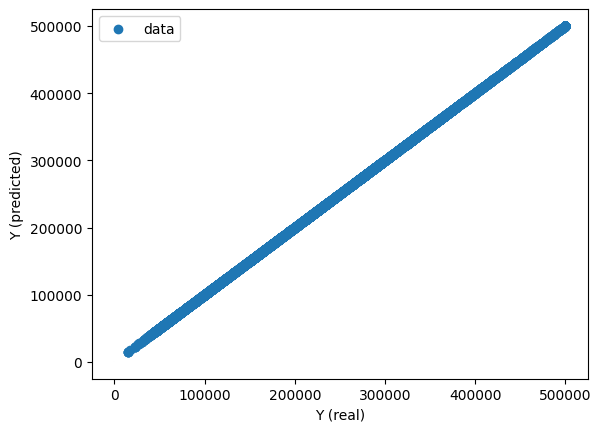

In [103]:
plt.scatter(BH_Y,Y_predicted,label='data')
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted)')
plt.plot([0,1.5],[0,1.5],'--k')
plt.legend()

mean =  0.0
median =  0.0
SD =  0.0


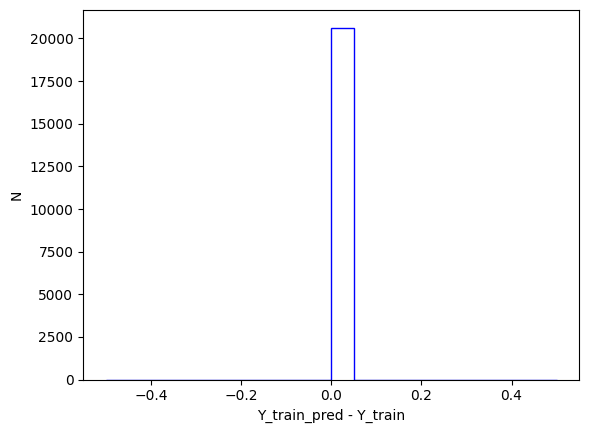

In [104]:
plt.hist(Y_predicted-BH_Y,20,color='b',histtype='step')
plt.xlabel('Y_train_pred - Y_train')
plt.ylabel('N')

print ('mean = ',np.mean(Y_predicted-BH_Y) )
print ('median = ',np.median(Y_predicted-BH_Y) )
print ('SD = ',np.std(Y_predicted-BH_Y) )

In [73]:
X_train,X_test,Y_train,Y_test = train_test_split(BHX_Normalized, BH_Y, test_size=.25, random_state=42)

KNeighborsRegressor(n_neighbors=25)

In [75]:
# predict on both training set and the test set

Y_train_pred= KNN.predict(X_train)
Y_test_pred= KNN.predict(X_test)

print(np.shape(Y_train_pred),np.shape(Y_test_pred))

(15480, 1) (5160, 1)


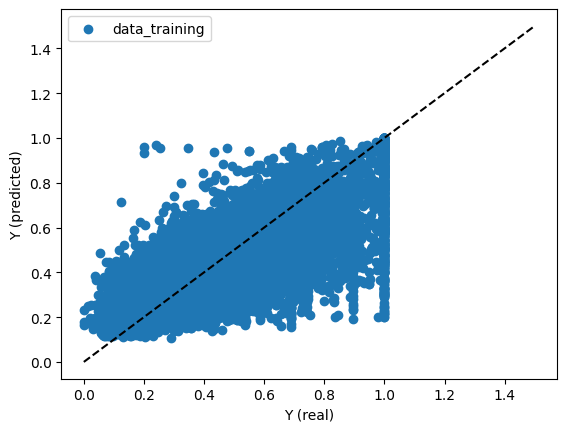

In [76]:
plt.scatter(Y_train,Y_train_pred,label='data_training')
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted)')
plt.plot([0,1.5],[0,1.5],'--k')
plt.legend()

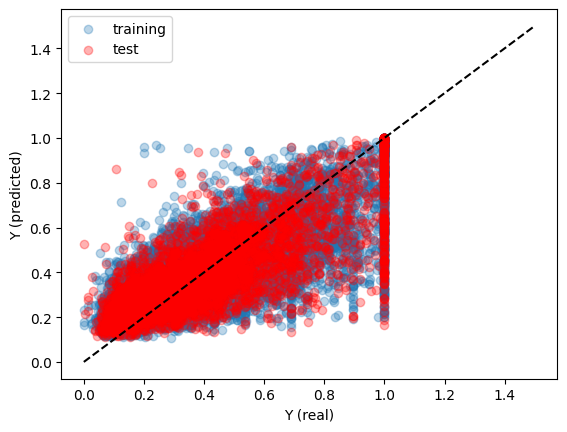

In [60]:
plt.scatter(Y_train,Y_train_pred,label='training',alpha=.3)
plt.scatter(Y_test,Y_test_pred,label='test',color='r',alpha=.3) 
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted)')
plt.plot([0,1.5],[0,1.5],'--k')
plt.legend()

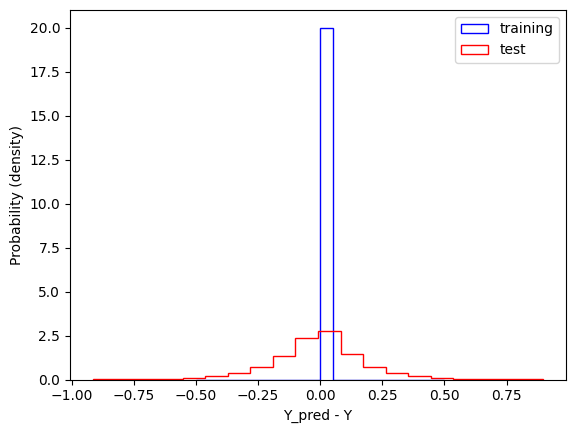

In [49]:
plt.hist(Y_train_pred-Y_train,20,color='b',histtype='step',density=True,label='training')
plt.hist(Y_test_pred-Y_test,20,color='r',histtype='step',density=True,label='test')
plt.xlabel('Y_pred - Y')
plt.ylabel('Probability (density)')
plt.legend()

In [ ]:
# Defining the ordinal encoder

def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df